Четыре черепахи находятся в углах квадрата со стороной а. Черепахи начинают двигаться одновременно с одинаковой и постоянной по модулю скоростью v, При этом первая черепаха все время держит курс на вторую, вторая — на третью, третья — на четвертую, четвертая — на первую. Через какое время t черепахи встретятся? 

Правила игры:
Только `numpy, matplotlib`. Никаких `append-ов`.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

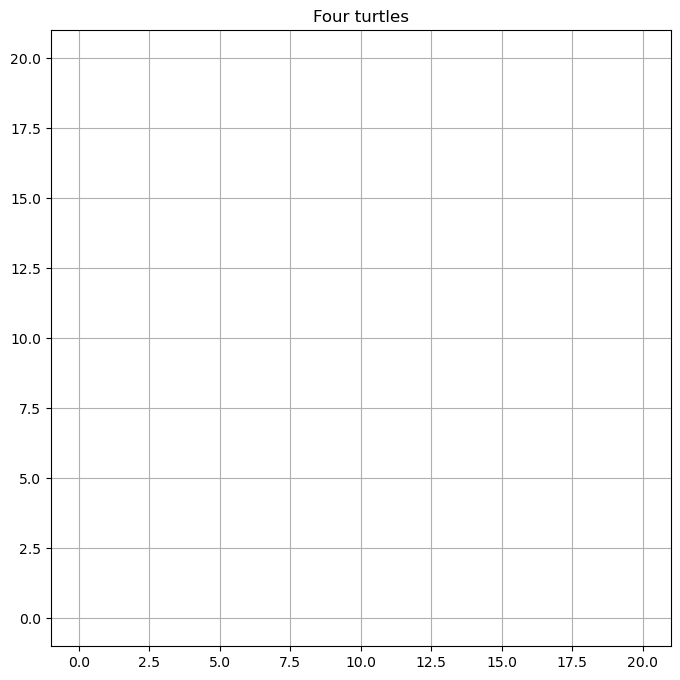

In [ ]:
a = 20 # длина квадрата
v = 1 # скорость
dt = 0.1 # шаг по времени

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_title("Four turtles")
ax.set_xlim(-1, a + 1)
ax.set_ylim(-1, a + 1)
ax.grid(True)

init_pos = np.array([
    [a, 1],
    [1, a],
    [a, a],
    [1, 1]
])